In [2]:
import cv2
from matplotlib import pyplot as plt
import skimage
import numpy as np
from core.utils import *

In [3]:
def display(im_data):
    dpi = 300

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [4]:
image_url = "https://storage.googleapis.com/nutrio-storage1/scannedNutrition/example_en.webp"
image = skimage.io.imread(image_url)
image = cv2.cvtColor(image, cv2.COLOR_RGBA2BGR)

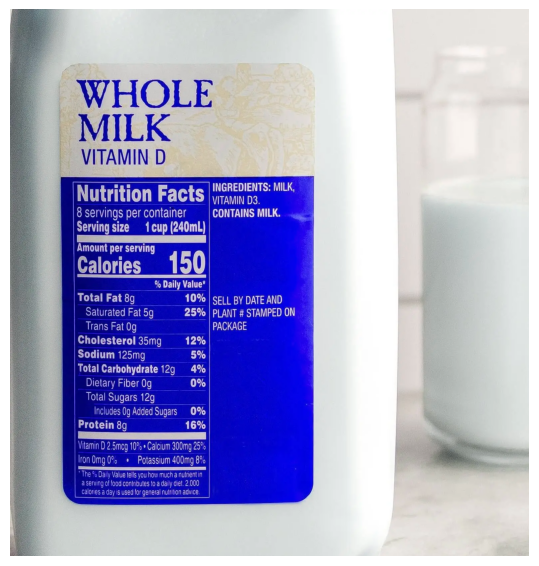

In [5]:
display(image)

In [6]:
from ultralytics import YOLO

model = YOLO("core/models/detect-nutrition-label.pt")

In [7]:
nutrition_table_prediction = model.predict(image)
x1, y1, x2, y2 = get_bounding_boxes(nutrition_table_prediction)
image = cropAndResize(image, (x1, y1, x2, y2))


0: 640x608 1 nutrition-label, 180.6ms
Speed: 13.7ms preprocess, 180.6ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 608)


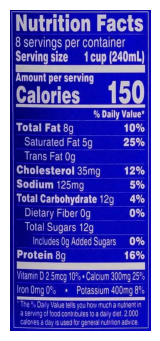

In [8]:
display(image)

In [9]:
# get OSD of the image
import json


orientation = detect_orientation(image)
print(f"Detected Orientation: {json.dumps(orientation)}")
image = rotateImage(image, orientation["orientation"] - 360)

Detected Orientation: {"page_num": 0, "orientation": 0, "rotate": 0, "orientation_conf": 13.12, "script": "Latin", "script_conf": 5.91}


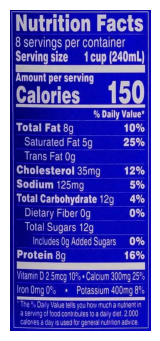

In [10]:
display(image)

In [11]:
inverted_image = cv2.bitwise_not(image)
cv2.imwrite('processed_image/inverted_image.jpg', inverted_image)

True

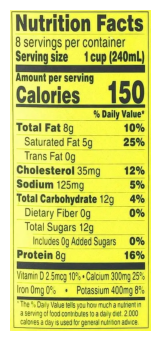

In [12]:
inverted_image = cv2.imread('processed_image/inverted_image.jpg')
display(inverted_image)

In [13]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [14]:
gray_image = grayscale(image)
cv2.imwrite('processed_image/grayscaled_image.jpg', gray_image)

True

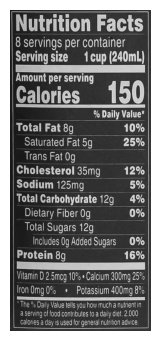

In [15]:
cv2.imread('processed_image/grayscaled_image.jpg')
display(gray_image)

In [16]:
thresh, im_bw = cv2.threshold(gray_image, 117, 255, cv2.THRESH_BINARY)
cv2.imwrite('processed_image/thresholded_image.jpg', im_bw)

True

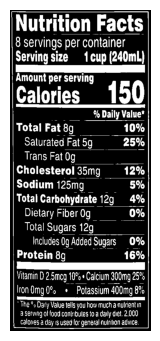

In [17]:
im_bw = cv2.imread('processed_image/thresholded_image.jpg')
display(im_bw)

In [18]:
def noise_removal(image):
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    
    return image

In [19]:
no_noise = noise_removal(im_bw)
cv2.imwrite('processed_image/no_noise_image.jpg', no_noise)

True

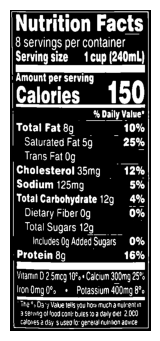

In [20]:
no_noise = cv2.imread('processed_image/no_noise_image.jpg')
display(no_noise)

In [21]:
def thin_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    
    return image

In [22]:
eroded_image = thin_font(no_noise)
cv2.imwrite('processed_image/eroded_image.jpg', eroded_image)

True

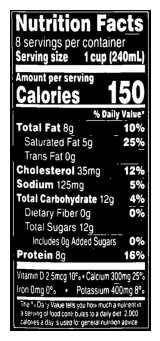

In [23]:
eroded_image = cv2.imread('processed_image/eroded_image.jpg')
display(eroded_image)

In [24]:
def thick_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2, 2), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    
    return image

In [25]:
dilated_image = thick_font(no_noise)
cv2.imwrite('processed_image/dilated_image.jpg', dilated_image)

True

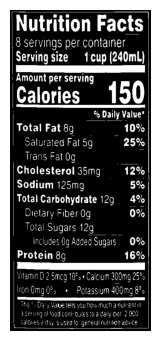

In [26]:
dilated_image = cv2.imread('processed_image/dilated_image.jpg')
display(dilated_image)

In [27]:
color = [255, 255, 255]
top, bottom, left, right = [150] * 4

In [28]:
image_with_border = cv2.copyMakeBorder(no_noise, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite('processed_image/image_with_border.jpg', image_with_border)

True

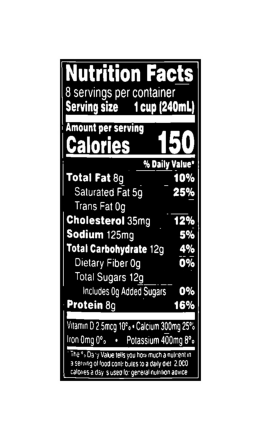

In [29]:
image_with_border = cv2.imread('processed_image/image_with_border.jpg')
display(image_with_border)